In [1]:
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
pd.options.display.max_columns = None
os.chdir('C:/Users/regru/Desktop/HEB')

In [2]:
widgets = pd.read_csv('widgets.csv',sep='"')
widgets.head()

,widget_id,construction,,size,.1,weight,.2,height,.3,zip,.4,quality,.5,style,.6,price,Unnamed: 16
0,y214837,steel,3.2 25.6 4.41 94112,great,,double-circle,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c117827,nickel,7.1 56.8 5.62 94158,bad,,oval,2215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e785982,nickel,4.1 41 4.8 94118,good,,triangle,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e58449,nickel,3.8 118.4 4.64 94130,good,,rectangle,833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e134968,steel,2.5 20 4.1 94114,okay,,double-circle,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
widgets['price'] = widgets.iloc[:,6]
widgets['style'] = widgets.iloc[:,5]
widgets['quality'] = widgets.iloc[:,3]

In [4]:
n = len(widgets)
zipcode = np.zeros(n)
for i in range(n):
    zipcode[i] = widgets.iloc[i,2].split()[3]
widgets['zip'] = zipcode

In [5]:
h = np.zeros(n)
for i in range(n):
    h[i] = widgets.iloc[i,2].split()[2]
widgets['height'] = h

In [6]:
w = np.zeros(n)
for i in range(n):
    w[i] = widgets.iloc[i,2].split()[1]
widgets['weight'] = w

In [7]:
s = np.zeros(n)
for i in range(n):
    s[i] = widgets.iloc[i,2].split()[0]
widgets['size'] = s

In [8]:
widgets.head()

,widget_id,construction,,size,.1,weight,.2,height,.3,zip,.4,quality,.5,style,.6,price,Unnamed: 16
0,y214837,steel,3.2 25.6 4.41 94112,3.2,,25.6,954.0,4.41,NaN,94112.0,NaN,great,NaN,double-circle,NaN,954.0,NaN
1,c117827,nickel,7.1 56.8 5.62 94158,7.1,,56.8,2215.0,5.62,NaN,94158.0,NaN,bad,NaN,oval,NaN,2215.0,NaN
2,e785982,nickel,4.1 41 4.8 94118,4.1,,41.0,772.0,4.80,NaN,94118.0,NaN,good,NaN,triangle,NaN,772.0,NaN
3,e58449,nickel,3.8 118.4 4.64 94130,3.8,,118.4,833.0,4.64,NaN,94130.0,NaN,good,NaN,rectangle,NaN,833.0,NaN
4,e134968,steel,2.5 20 4.1 94114,2.5,,20.0,575.0,4.10,NaN,94114.0,NaN,okay,NaN,double-circle,NaN,575.0,NaN


In [9]:
blank_col = widgets.columns[2]

In [10]:
# List of cols to remove
drop_cols = [blank_col,' .1',' .2',' .3',' .4',' .5',' .6','Unnamed: 16']
widgets = widgets.drop(drop_cols,axis=1)

In [11]:
# 1c) which variable contains NAs? how many NAs?
np.sum(widgets.isna())

widget_id         0
construction      0
size              0
weight            0
height            0
zip               0
quality           0
style           426
price           426
dtype: int64

In [12]:
# Question 1c
# NA's account for ~1% of data
np.mean(widgets.isna())

widget_id       0.000000
construction    0.000000
size            0.000000
weight          0.000000
height          0.000000
zip             0.000000
quality         0.000000
style           0.009467
price           0.009467
dtype: float64

In [13]:
df = widgets.dropna()

In [14]:
df.shape

(44574, 9)

In [15]:
np.mean(df.isna())

widget_id       0.0
construction    0.0
size            0.0
weight          0.0
height          0.0
zip             0.0
quality         0.0
style           0.0
price           0.0
dtype: float64

In [16]:
df.head()

,widget_id,construction,size,weight,height,zip,quality,style,price
0,y214837,steel,3.2,25.6,4.41,94112.0,great,double-circle,954.0
1,c117827,nickel,7.1,56.8,5.62,94158.0,bad,oval,2215.0
2,e785982,nickel,4.1,41.0,4.80,94118.0,good,triangle,772.0
3,e58449,nickel,3.8,118.4,4.64,94130.0,good,rectangle,833.0
4,e134968,steel,2.5,20.0,4.10,94114.0,okay,double-circle,575.0


In [17]:
# Question 1e
df.describe()

,size,weight,height,zip,price
count,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000
mean,7.994223,79.526895,5.733880,94119.156661,3904.119891
std,4.759074,48.316700,1.124247,12.444465,4002.907694
min,2.000000,16.000000,0.000000,94102.000000,-99.000000
25%,4.000000,38.700000,4.710000,94109.000000,935.000000
50%,7.000000,71.000000,5.700000,94117.000000,2376.000000
75%,10.400000,105.000000,6.540000,94129.000000,5294.000000
max,50.100000,450.900000,10.740000,94158.000000,18823.000000


In [18]:
# 1a) what are the dimensions of the data set?
df.shape

(44574, 9)

In [19]:
# 1b) which variables should be numeric?
# size, weight, height, and price. Zip should be a string.
df.dtypes

widget_id        object
construction     object
size            float64
weight          float64
height          float64
zip             float64
quality          object
style            object
price           float64
dtype: object

In [20]:
# Convert zip code to string
import warnings
warnings.filterwarnings("ignore")
df.zip = df.zip.astype(np.int64)
df.zip = df.zip.astype(str)

In [21]:
df.dtypes

widget_id        object
construction     object
size            float64
weight          float64
height          float64
zip              object
quality          object
style            object
price           float64
dtype: object

In [22]:
# 1d) what other variable/column might have missing/problematic data?
# Quality and Price have .9% missing values. This is problematic because price is what I'm trying to predict and
# if I were to impute values for price using the median for example, all variance in the data would be removed for 
# those data points and this would drastically affect my model performance on new data.
# Also, zip codes can be problematic because if left as a numeric type, the model will interpret the values
# in an ordinal manner and if zip is used as a categorical feature the model won't be able to predict price
# on data with new zipcodes.

In [23]:
# 1f) How will you deal with the missing/problematic data in 1c) and 1d) for purposes of training your data?
# I will remove rows with missing values in price and/or quality. This only accounts for .9% of the data
# I will also remove zip codes from the linear model
# For categorical features, I will encode them with integers because the model won't know how to treat strings.

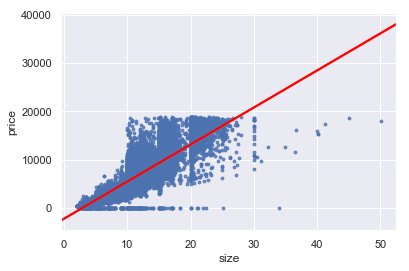

In [24]:
# 2a) create a scatter plot of widget size and price (price on y-axis)
sns.set()
sns.regplot(x='size',y='price',data=df,scatter_kws={'s':8},line_kws={'color':'red'})
plt.show()

In [29]:
# 2b) describe the relationshp between size and price
# Size and price have a strong positive linear relationship.
df.corr().iloc[0,3]

0.913318012437256

In [30]:
# 2c) why might you transform these variables? how?
# I might consider doing a principal component analysis on the variables that are highly correlated
# in order to retain as much information as possible as opposed to dropping the variables.

In [31]:
# 3a) which construction material sold the most units?
df['construction'].value_counts()

nickel      9282
steel       8137
aluminum    7876
copper      6875
titanium    5612
brass       4474
bronze      2318
Name: construction, dtype: int64

In [32]:
# 3b) which construction material had the greatest mean price?
# bronze
df[['construction','price']].groupby(['construction']).mean().sort_values(['price'], ascending=False)

,price
construction,
bronze,5284.321829
brass,5105.960662
copper,4443.492364
nickel,3988.000215
aluminum,3691.855383
titanium,3103.399501
steel,3056.428045


In [33]:
# 3c) which combination of construction material and style had the greatest max price?
# Titanium, double tri-angle
df[['construction','style','price']].groupby(['construction','style']).mean().sort_values(['price'], ascending=False)

price
construction style                       
titanium     double-triangle  7824.238095
brass        square           6973.922659
bronze       square           6483.972081
copper       square           6074.177245
brass        triangle         5661.414733
             oval             5451.963311
bronze       circle           5416.755556
             triangle         5276.392628
             double-square    5184.339286
             oval             5170.302932
copper       oval             5012.702788
nickel       square           5008.822656
bronze       rectangle        4819.323326
brass        rectangle        4649.213924
copper       triangle         4620.812913
brass        circle           4577.520548
copper       circle           4531.774436
aluminum     square           4491.055261
nickel       triangle         4402.332470
steel        square           4223.074461
nickel       rectangle        4128.991429
titanium     square           3839.062281
nickel       oval             3789.660870
             double-square    3781.318937
aluminum     rectangle        3764.998211
copper       rectangle        3745.846626
aluminum     oval             3682.671591
steel        circle           3670.035714
aluminum     triangle         3669.597345
titanium     circle           3602.735294
nickel       circle           3536.884298
aluminum     double-square    3483.044665
steel        double-triangle  3465.305970
bronze       double-circle    3437.634615
titanium     double-square    3246.139381
aluminum     circle           3225.691667
bronze       double-triangle  3123.045455
steel        oval             3081.494024
titanium     rectangle        2991.484034
brass        double-square    2952.951220
titanium     oval             2922.955180
nickel       double-circle    2890.308627
aluminum     double-circle    2845.269608
steel        rectangle        2831.500943
titanium     double-circle    2809.677570
steel        triangle         2767.205753
aluminum     double-triangle  2668.413897
titanium     triangle         2546.010745
copper       double-square    2521.656687
nickel       double-triangle  2518.538188
steel        double-square    2466.503695
copper       double-triangle  2195.495690
steel        double-circle    2108.152450
brass        double-circle    2004.933333
             double-triangle  2000.879032
copper       double-circle    1757.869474

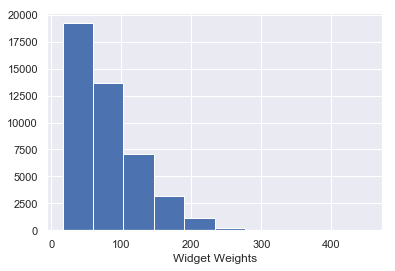

In [34]:
# 4a) create a histogram of widget weight
plt.hist(df['weight'])
plt.xlabel('Widget Weights')
plt.show()

In [35]:
# 5a) what is the correlation coeﬃcient between widget size and height?
# .975178
df.corr()

,size,weight,height,price
size,1.000000,0.884800,0.975178,0.913318
weight,0.884800,1.000000,0.863075,0.808283
height,0.975178,0.863075,1.000000,0.876525
price,0.913318,0.808283,0.876525,1.000000


In [36]:
# 5b) why is this problematic for some models?
# highly correlated predictor variables can lead to multicollinearity in linear regression models.

In [37]:
# 5c) how might you deal with this if you want to train a linear model?
# You can drop one of the highly correlated variables.

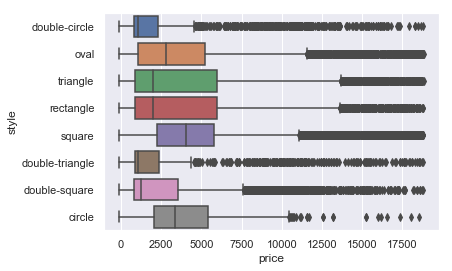

In [38]:
# 6a) create a box plot of prices by widget style
# 6b) which widget style has the highest median price
# Square style has the highest median price
sns.boxplot(x='price',y='style',data=df)
plt.show()

In [39]:
df.head()

,widget_id,construction,size,weight,height,zip,quality,style,price
0,y214837,steel,3.2,25.6,4.41,94112,great,double-circle,954.0
1,c117827,nickel,7.1,56.8,5.62,94158,bad,oval,2215.0
2,e785982,nickel,4.1,41.0,4.80,94118,good,triangle,772.0
3,e58449,nickel,3.8,118.4,4.64,94130,good,rectangle,833.0
4,e134968,steel,2.5,20.0,4.10,94114,okay,double-circle,575.0


In [42]:
# Drop id (not predictive), weight (highly correlated with size), height (highly correlated with size), and 
# zip code (categorical feature that the model won't be able to use when predicting on new data)
wid = df.columns[0]
mod_df = df.drop([wid,'weight','height','zip'],axis=1)

In [43]:
# Convert categorical variables to numeric
mod_df['construction'] = pd.Categorical(mod_df['construction']).codes
mod_df['quality'] = pd.Categorical(mod_df['quality']).codes
mod_df['style'] = pd.Categorical(mod_df['style']).codes
mod_df.head()

,construction,size,quality,style,price
0,5,3.2,2,1,954.0
1,4,7.1,0,4,2215.0
2,4,4.1,1,7,772.0
3,4,3.8,1,5,833.0
4,5,2.5,3,1,575.0


In [44]:
# Create dictionary's for each categorical variable to link category with value
construction_dict = dict(zip(df['construction'].unique(), mod_df['construction'].unique()))
quality_dict = dict(zip(df['quality'].unique(), mod_df['quality'].unique()))
style_dict = dict(zip(df['style'].unique(), mod_df['style'].unique()))

In [45]:
# 7a) Did you split your data? If so, how and why?
# Yes, I split the data into 80% training, 20% test. I split the data to be able compare the performance of the model on
# unseen data to the training set. This is done to help avoid overfitting.

# 7b) How would you ensure that your experimental groups (train/test) are comparable/equivalent?
# Using a large data set, so that both the training and test set are large enough to represent the entire
# data set. 

# 7c) What would you do if train/test groups are not comparable?
# I would ajust the size of the test set and start over
features = mod_df.drop('price',axis=1)
label = mod_df['price']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features.values,label.values,test_size=0.2,random_state=344)

In [47]:
# 8a) train a linear model on these data - what are the signiﬁcant variables?
# construction type, size, quality and style are all significant features.

# 9a) test your model - how did it perform?
# My linear model explains 84% of the variation in price
import statsmodels.api as sm
xtrain = sm.add_constant(xtrain)
reg = sm.OLS(ytrain, xtrain)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 4.673e+04
Date:                Mon, 22 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:03:17   Log-Likelihood:            -3.1379e+05
No. Observations:               35659   AIC:                         6.276e+05
Df Residuals:                   35654   BIC:                         6.276e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2166.8461     34.138    -63.474      0.000   -2233.757   -2099.936
x1            79.1738      4.258     18.594      0.000      70.828      87.520
x2           783.7135      1.837    426.595      0.000     780.113     787.314
x3            -2.7478      8.770     -0.313      0.754     -19.936      14.441
x4           -91.7898      4.525    -20.284      0.000    -100.659     -82.920
==============================================================================
Omnibus:                     6726.633   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182538.308
Skew:                           0.170   Prob(JB):                         0.00
Kurtosis:                      14.079   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 10a) how might you increase the performance of your model?
# I would try including zip code and keeping it as a numeric variable because zip code numbers that are
# close to each other are also close geographically and therefore this might make sense in the model

# I would also try performing a Principal Component Analysis on size, weight, and height to retain
# as much of that information as possible rather than just dropping weight and height.